In [1]:
import numpy as np
from prediction_data import PredictionData

## The Data

The includes features of neighborhood schools between 2000 and 2010, including the change in enrollment as well as test scores, the change in population in the surrounding ward, the change in enrollment in nearby charter schools and more. The target in the data set is the decrease in enrollment. It seems like the best predictor will be the decrease in population in the surrouding ward, but one theory I have is that charter schools are having a prominent negative impact on neighborhood school enrollment A charter school popping up near a neighborhood school will cause a decline. To that end I have two features charter school enrollment change within 1 mile and within 3 mile. This takes the change in charter school enrollment for schools of the same grade level as the neighborhood school within those two radiuses. 

In [2]:
stl_schools = PredictionData("stl_neighborhood_schools.csv", [i for i in range(2,19)])

## 2.1 Plotting the prediction data

I'll start by plotting the enrollment change against the change in the child population of the surrounding ward.

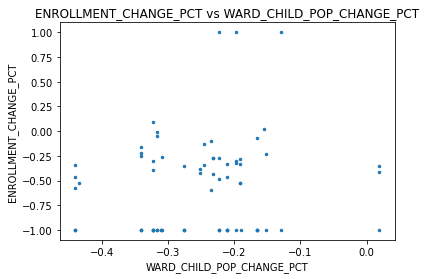

In [3]:
stl_schools.plot("ENROLLMENT_CHANGE_PCT", "WARD_CHILD_POP_CHANGE_PCT")

I think I can see a somewhat positive relationship, but the data is pretty noisy.

## 2.2 Standardizing the data

I've opted to create a function that can standardize one feature at a time. The thought being that dummy variable don't need to be standardized, but I will standardize all the features and the target to be used in the regression. Just to see that it works, here is the target:

In [4]:
print(stl_schools["ENROLLMENT_CHANGE_PCT"])
stl_schools.standardize("ENROLLMENT_CHANGE_PCT")
print(stl_schools["ENROLLMENT_CHANGE_PCT"])

[-0.34572491 -0.27564103 -1.         -1.         -0.57142857 -0.31919192
 -1.         -1.         -0.07027027 -1.         -0.30666667 -1.
 -0.35151515 -1.         -0.35696203 -1.         -0.30363036 -1.
 -0.26638478 -0.2823219  -1.         -1.         -1.         -1.
  0.0255102  -0.23150358 -1.          1.         -0.38728324 -1.
 -1.         -0.46388889  1.         -1.         -1.         -1.
 -0.21758242 -1.         -0.41071429 -0.01023018 -0.52854123 -1.
 -0.33787466 -1.         -1.         -0.25633803  1.         -0.52895753
 -1.         -0.52649007 -0.48723404 -1.         -0.05012531 -1.
 -1.         -0.59067357 -1.         -0.3964497  -1.         -0.125
 -0.27360775 -0.25581395 -0.15738499 -0.42857143 -1.         -1.
 -0.09818182 -1.         -1.         -1.         -1.         -0.42270531
 -0.4662116  -0.33260274  0.08798017 -0.33242999]
[ 0.47595157  0.621835   -0.88595773 -0.88595773  0.00613708  0.53118144
 -0.88595773 -0.88595773  1.04932543 -0.88595773  0.55725343 -0.885957

Now for all the features:

In [5]:
stl_schools.standardize_multiple(["WARD_CHILD_POP_CHANGE_PCT", "ENG", "MATH", "CHARTER_CHANGE_1", "CHARTER_CHANGE_3", "BLACK_PCT"])

## 2.3 Finding the best model

Now I'll run a regression on each feature to see which model the change in enrollment in neighborhood schools the best.

### Change in the child population in the surrounding ward

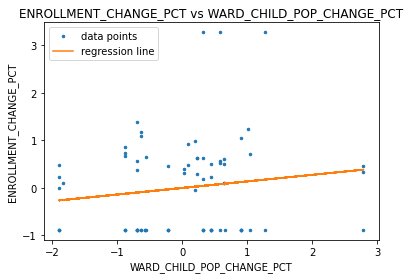

Beta=[-1.91982021e-16  1.38114770e-01]
R = [74.55024758]


In [6]:
beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "WARD_CHILD_POP_CHANGE_PCT")

print(f"Beta={beta}")
print(f"R = {r}")

As I thought there is a slight positive relationships. As the ward population change increases so does the enrollment in the neighborhood school.

### Change in charter school enrollment

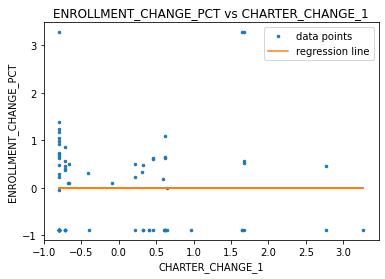

Beta=[-1.91982021e-16 -1.31946684e-03]
R = [75.99986768]


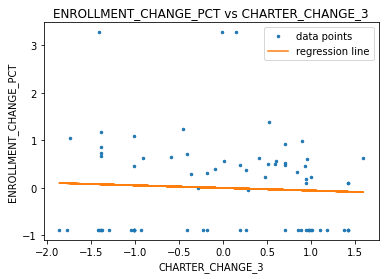

Beta=[-1.91982021e-16 -5.49592445e-02]
R = [75.77044059]


In [7]:
beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "CHARTER_CHANGE_1")

print(f"Beta={beta}")
print(f"R = {r}")

beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "CHARTER_CHANGE_3")

print(f"Beta={beta}")
print(f"R = {r}")

A bit of a hit to my theory here although the R for charter school change within a mile is almost the same as for the ward population change there's only a very small negatvive relationship. When expanded to a 3 mile radius it becomes a slightly better indicator and more of a negative relationship. 

### School Performance

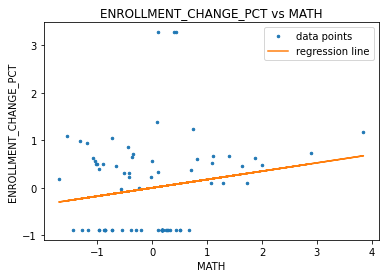

Beta=[-1.91982021e-16  1.75385399e-01]
R = [73.66223709]


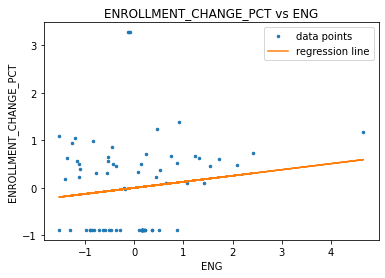

Beta=[-1.91982021e-16  1.27362876e-01]
R = [74.76718104]


In [8]:
beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "MATH")

print(f"Beta={beta}")
print(f"R = {r}")

beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "ENG")
print(f"Beta={beta}")
print(f"R = {r}")

Looking at school performance's relationship to enrollment change, both have a positive relationship. Math does a little better as a predictor and in fact does a little better than the change in the surrounding population and english scores do almost as well. 

### % of African American students

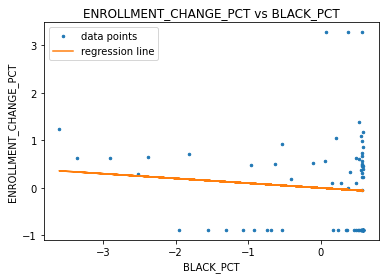

Beta=[-1.91982021e-16 -1.00059749e-01]
R = [75.23909154]


In [9]:
beta, r = stl_schools.linear_regression("ENROLLMENT_CHANGE_PCT", "BLACK_PCT")

print(f"Beta={beta}")
print(f"R = {r}")

A slight negative relationship, but not as good of a predictor as some of the other ones.

## Picking a winner

It seems with the small R and a nice looking regression line that Math scores were the best predictor of enrollment changes. Perhaps reputation plays more of a role in a school's enrollment, even when that school is a neighborhood school, that the surrounding population. Perhaps also SLPS diverts resources away from those schools. There are a lot of reasons why it might be the case.

## Can a multivariate regression do better

Just to try it out I created a function using multiple features to perform the regression. I'm going to try a few.

In [10]:
beta, r = stl_schools.multi_variate_linear_regression("ENROLLMENT_CHANGE_PCT", ["WARD_CHILD_POP_CHANGE_PCT", "MATH"])

print(f"Beta={beta}")
print(f"R = {r}")

Beta=[-1.91982021e-16  1.72099734e-01  2.04049104e-01]
R = [71.47368709]


Starting off with my two best predictors, we do get a even stronger prediction. Lets add in charter school enrollment.

In [11]:
beta, r = stl_schools.multi_variate_linear_regression("ENROLLMENT_CHANGE_PCT", ["WARD_CHILD_POP_CHANGE_PCT", "MATH", "CHARTER_CHANGE_1"])

print(f"Beta={beta}")
print(f"R = {r}")

beta, r = stl_schools.multi_variate_linear_regression("ENROLLMENT_CHANGE_PCT", ["WARD_CHILD_POP_CHANGE_PCT", "MATH", "CHARTER_CHANGE_3"])

print(f"Beta={beta}")
print(f"R = {r}")

Beta=[-1.91982021e-16  1.72679235e-01  2.03771982e-01 -6.34617974e-03]
R = [71.47066169]
Beta=[-1.91982021e-16  1.71899083e-01  2.00066180e-01 -2.08082076e-02]
R = [71.44196896]


A slight improvement but it doesn't help a whole lot. Let's keep the 3 mile radius and throw in English.

In [12]:
beta, r = stl_schools.multi_variate_linear_regression("ENROLLMENT_CHANGE_PCT", ["WARD_CHILD_POP_CHANGE_PCT", "MATH", "ENG", "CHARTER_CHANGE_3"])

print(f"Beta={beta}")
print(f"R = {r}")

Beta=[-1.91982021e-16  1.65521540e-01  3.21127852e-01 -1.32730590e-01
 -1.23663701e-02]
R = [71.215283]


Not getting a whole lot better, one final thing, I want to see if the dummy variables for school type help at all.

In [13]:
beta, r = stl_schools.multi_variate_linear_regression("ENROLLMENT_CHANGE_PCT", ["WARD_CHILD_POP_CHANGE_PCT", "MATH", "ENG", "CHARTER_CHANGE_3", "ELEM", "MIDDLE", "HIGH"])
print(f"Beta={beta}")
print(f"R = {r}")

Beta=[ 0.21559245  0.18195205  0.63276343 -0.42726062 -0.03098686 -0.26165073
 -0.27290847  0.99399429]
R = [66.13878169]


Nice!

## About charter schools

The data showed a slight relationship between charter enrollment increase and neighborhood school enrollment decrease. It may take some more exploring (like looking at 2010 to 2020 data), but there is at least some evidence that it may be having an effect.